# To get the US Financial Statements comfortably by fundamentalanalysis pkg
# Otherwise, need to access SEC or crawling website such as yahoo finance

In [1]:
import fundamentalanalysis as fra
import matplotlib.pyplot as plt
import yaml

with open('..\config.yaml', encoding='UTF-8') as f:
    _cfg = yaml.load(f, Loader=yaml.FullLoader)

API_KEY = _cfg['API_KEY_SECRET']
ROW_NUM = 10

In [5]:
companies = fra.available_companies(API_KEY)
companies.iloc[5:10]

,name,price,exchange,exchangeShortName,type
symbol,,,,,
ITC.NS,ITC Limited,379.6,National Stock Exchange of India,NSE,stock
NCC.NS,NCC Limited,104.4,National Stock Exchange of India,NSE,stock
BROOKS.NS,Brooks Laboratories Limited,65.5,National Stock Exchange of India,NSE,stock
ONGC.NS,Oil and Natural Gas Corporation Limited,153.7,National Stock Exchange of India,NSE,stock
DLF.NS,DLF Limited,367.8,National Stock Exchange of India,NSE,stock


In [6]:
ticker = 'TSLA'
profile = fra.profile(ticker, API_KEY)
profile

,0
symbol,TSLA
price,184.13
beta,2.070501
volAvg,184604408
mktCap,582605750676
lastDiv,0
range,101.81-384.29
changes,3.68
companyName,"Tesla, Inc."
currency,USD


In [7]:
enterprise_value = fra.enterprise(ticker, API_KEY)
enterprise_value

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
symbol,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
stockPrice,123.18,352.26,235.2233,27.8887,22.1867,20.7567,14.246,16.0007,14.8273,10.0286,2.258,1.904,1.7753,1.5927,1.5927,1.5927
numberOfShares,2958000000,2958000000,2880000000,2655000000,2557875000,2486370000,2163180000,1923030000,1868595000,1791315000,1610235000,1505832225,760774530,1165407810,2044950000,2044950000
marketCapitalization,364366440000,1041985080000,677443104000,74044498500,56750805262.499992,51608836179,30816662280,30769826120.999996,27706218643.5,17964381609,3635910630,2867104556.4,1350603023.109,1856145018.987,3256991865,3256991865
minusCashAndCashEquivalents,16253000000,17576000000,19384000000,6268000000,3685618000,3367914000,3393216000,1196908000,1905713000,845889000,201890000,255266000,99558000,69627000,9277000,17211000
addTotalDebt,5748000000,8873000000,13279000000,14697000000,13827271000,12115948000,8588115000,2715586000,2509109000,606878000,466666000,280148000,72603000,1090000,55757000,98000
enterpriseValue,353861440000,1033282080000,671338104000,82473498500,66892458262.499992,60356870179,36011561280,32288504120.999996,28309614643.5,17725370609,3900686630,2891986556.4,1323648023.109,1787608018.987,3303471865,3239878865


Text(0.5, 1.0, 'TESLA Revenue/Cost of Revenue')

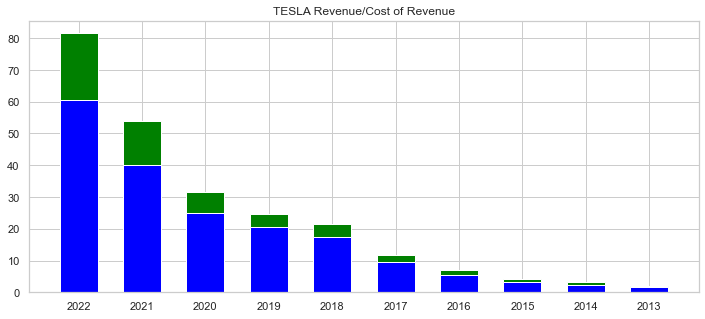

In [220]:
plt.figure(figsize=(12, 5))

bs_annually = fra.balance_sheet_statement(ticker, API_KEY, period='annual')
income_statement_annually = fra.income_statement(ticker, API_KEY)
cf_statement_annually = fra.cash_flow_statement(ticker, API_KEY)
x = income_statement_annually.columns
revenue = income_statement_annually.loc['revenue'][:ROW_NUM].apply(lambda x: x / 1000000000)
cost = income_statement_annually.loc['costOfRevenue'][:ROW_NUM].apply(lambda x: x / 1000000000)

plt.bar(x[:ROW_NUM], revenue, color='green', width=0.6)
plt.bar(x[:ROW_NUM], cost, color='blue', width=0.6)

plt.title("TESLA Revenue/Cost of Revenue")

## For the better visualization(upgrade matplotlib)

# ax.bar_label() : add label on the graph
# however, here used text function to manipulate the data

IndexError: index 10 is out of bounds for axis 0 with size 10

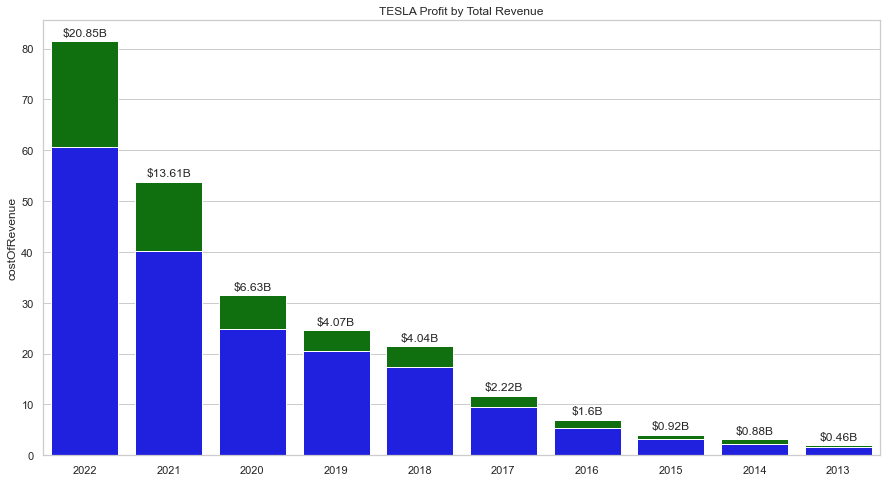

In [221]:
import seaborn as sns

sns.set(font_scale=1.5)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 8))

ax_revenue = sns.barplot(x=x[:ROW_NUM], y=revenue, color='green')
ax_cost = sns.barplot(x=x[:ROW_NUM], y=cost, color='blue')
plt.title("TESLA Profit by Total Revenue")
profit = round(revenue - cost,2)

# ax_revenue.bar_label(ax_revenue.containers[0])

for index, p in enumerate(ax_revenue.patches):
    if index > 10:
        index = 1
    ax_revenue.text(p.get_x() + p.get_width()/2, p.get_height() +1, '$' + str(profit[index]) + 'B', ha='center')

plt.show()


In [222]:
revenue_cost = income_statement_annually.T[['revenue', 'costOfRevenue']][:ROW_NUM]

revenue_cost['profit'] = profit

revenue_cost

,revenue,costOfRevenue,profit
2022,81462000000,60609000000,20.85
2021,53823000000,40217000000,13.61
2020,31536000000,24906000000,6.63
2019,24578000000,20509000000,4.07
2018,21461268000,17419247000,4.04
2017,11758751000,9536264000,2.22
2016,7000132000,5400875000,1.60
2015,4046025000,3122522000,0.92
2014,3198356000,2316685000,0.88
2013,2013496000,1557234000,0.46


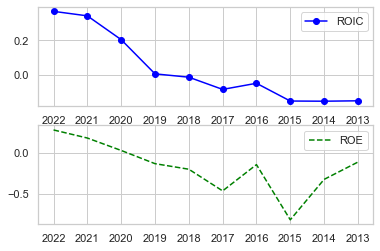

In [223]:
ratios = fra.key_metrics(ticker, API_KEY)

x = ratios.columns
roic = ratios.loc['roic'][:ROW_NUM]
roe = ratios.loc['roe'][:ROW_NUM]

plt.subplot(211)
plt.plot(x[:ROW_NUM], roic, color='blue', marker='o', label='ROIC')
plt.legend()
plt.subplot(212)
plt.plot(x[:ROW_NUM], roe, color='green', linestyle='--', label='ROE')
plt.legend()

Text(0.5, 1.0, 'TESLA Inventory Turnover')

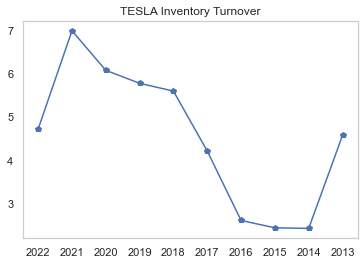

In [224]:
fin_ratio = fra.financial_ratios(ticker, API_KEY)
it = fin_ratio.loc['inventoryTurnover'][:ROW_NUM]
plt.grid()
plt.plot(x[:ROW_NUM], it, marker='p')
plt.title('TESLA Inventory Turnover')